## Beer Recommendation System --Final report 


In [2]:
# main modules needed
# Data analysis libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
pd.options.display.max_columns = None

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("Set1")



In [3]:
# Data fields
# brewery_id - an identifier for the brewery
# beer_ABV - the alcohol by volume of the beer
# beer_beerId - a unique ID indicating the beer reviewed
# beer_brewerId - a unique ID indicating the brewery
# beer_name - name of the beer
# beer_style- The style of beer
# # review_appearance - rating of the beer's appearance (1.0 to 5.0)
# review_aroma - rating of the beer's aroma (1.0 to 5.0)
# review_overall - rating of the beer overall (1.0 to 5.0)
# review_palate - rating of the beer's palate (1.0 to 5.0)
# review_taste - rating of the beer's taste (1.0 to 5.0)
## review_time - a dict specifying when the review was submitted

###  1.1 Basic information acquiring

In [4]:
df=pd.read_csv('beer_reviews.csv')

In [5]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [5]:
df.shape

(1586614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [7]:
print(df.isnull().sum())

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [9]:
df=df.dropna()

In [10]:
# Check for null values
print(df.isnull().sum())

brewery_id            0
brewery_name          0
review_time           0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
beer_style            0
review_palate         0
review_taste          0
beer_name             0
beer_abv              0
beer_beerid           0
dtype: int64


In [11]:
## Basic information extraction

In [12]:
## Total number of unique breweries

In [13]:
print( 'Unique breweries:' )
print( 'Based on brewery id:', df[ 'brewery_id' ].nunique() )
print( 'Based on name:', df[ 'brewery_name' ].nunique() )

Unique breweries:
Based on brewery id: 5230
Based on name: 5155


In [14]:
 ## Total number of  unique beers

In [15]:
print( 'Unique beers:' )
print( 'Based on beer id:', df[ 'beer_beerid' ].nunique() )
print( 'Based on name:', df[ 'beer_name' ].nunique() )

Unique beers:
Based on beer id: 49000
Based on name: 44075


In [16]:
 ## Total number of  unique reviewers

In [17]:
print( 'Unique reviewers:', df[ 'review_profilename' ].nunique() )

Unique reviewers: 32908


In [18]:
## Total number of  unique reviewers with equal or more than 2 review

In [19]:
from collections import Counter
Counter(df['review_profilename'].value_counts() > 1)

Counter({True: 22638, False: 10270})

### 1.2 Data Cleaning

In [20]:
## find nan value in "beer_abv" and replace the nan with mean abv of the style

In [21]:
df['style_mean_ABV'] = df.groupby('beer_style')['beer_abv'].transform('mean')

In [22]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,style_mean_ABV
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,5.259343
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,7.334030
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,7.683276
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,5.044475
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,9.370207


In [23]:
## find out indexes with nan values
indexes = df['beer_abv'].index[df['beer_abv'].apply(np.isnan)]

In [24]:
## replace the nan with mean abv of the style
n=[]
for i in indexes:
    n.append(i)
    df['beer_abv'][i]=df['style_mean_ABV'][i]
print(len(n))

0


In [25]:
## count the number of review and discard the number <5

In [26]:
df['id_count'] = df.groupby('beer_beerid')['beer_beerid'].transform('count')

In [27]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,style_mean_ABV,id_count
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,5.259343,1
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,7.334030,1
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,7.683276,1
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,5.044475,1
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,9.370207,1


In [28]:
df_re=df[df.id_count>=5]

In [29]:
df.shape

(1518478, 15)

In [30]:
df_re.shape

(1464786, 15)

In [31]:
### Ensure review index in appropriate range (1.0-5.0)

## 2. Data Exploration

### 2.1 Describe statistics 

In [32]:
df_re=df_re[(df.review_overall>0 )|(df.review_overall <5 )
            |(df.review_aroma >0 )|(df.review_aroma<5)
           |(df.review_appearance >0 )|(df.review_appearance<5)
           |(df.review_palate >0 )|(df.review_palate<5)
           |(df.review_taste >0 )|(df.review_taste<5)]

In [33]:
### Deal with review_time

In [34]:
df_re[ 'review_time' ] = pd.to_datetime( df[ 'review_time' ], unit = 's' )

In [35]:
df_re.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,style_mean_ABV,id_count
5,1075,Caldera Brewing Company,2012-01-02 17:17:39,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,Caldera Ginger Beer,4.7,52159,6.592346,9
6,1075,Caldera Brewing Company,2011-10-19 02:25:15,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159,6.592346,9
7,1075,Caldera Brewing Company,2011-05-24 22:26:58,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159,6.592346,9
8,1075,Caldera Brewing Company,2010-11-22 19:35:03,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159,6.592346,9
9,1075,Caldera Brewing Company,2010-09-28 00:15:24,4.5,3.5,5.0,augustgarage,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159,6.592346,9


In [36]:
df_groupby_year = df_re[['review_time' ]].groupby(df_re[ 'review_time' ].dt.year).agg(['count'])

In [37]:
df_groupby_year.reset_index()
df_groupby_year=df_groupby_year['review_time'].reset_index()

In [38]:
df_groupby_year=df_groupby_year.rename(columns={'count':'Review Count/year'})

In [39]:
df_groupby_year.head()

,review_time,Review Count/year
0,1996,1
1,1998,65
2,1999,30
3,2000,93
4,2001,1746


<Figure size 1584x576 with 0 Axes>

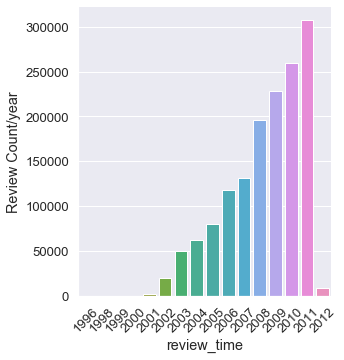

In [40]:
import seaborn as sns; sns.set(style="ticks", color_codes=True);sns.set(font_scale=1.2)
plt.figure( figsize = ( 22, 8) )
chart=sns.catplot(x='review_time',y='Review Count/year',data=df_groupby_year,kind='bar')
chart.set_xticklabels(rotation=45)

In [41]:
df_groupby_id=df_re[ [ 'review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv','beer_beerid']].groupby(df['beer_beerid']).mean()

In [42]:
df_groupby_id.describe().round(2)

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,19209.00,19209.00,19209.00,19209.00,19209.00,19209.00,19209.00
mean,3.71,3.62,3.74,3.63,3.66,6.58,32920.50
std,0.45,0.48,0.38,0.44,0.50,2.18,22462.01
min,1.14,1.17,1.50,1.23,1.15,0.05,5.00
25%,3.50,3.40,3.57,3.42,3.42,5.00,11303.00
50%,3.79,3.69,3.81,3.70,3.75,6.00,32914.00
75%,4.00,3.94,4.00,3.92,4.00,7.80,52144.00
max,4.94,5.00,4.93,4.94,4.94,41.00,76896.00


In [43]:
### ECDF for the review indexes

In [44]:
  def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x= np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

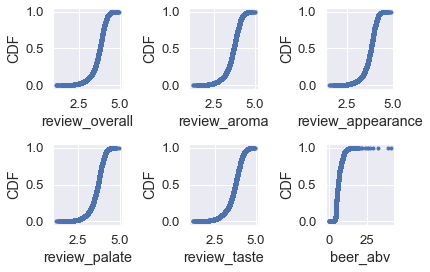

<Figure size 288x288 with 0 Axes>

In [45]:
# Get the CDF of the samples and of the data
x,y=ecdf(df_groupby_id['review_overall'])

# Plot the CDFs and show the plot for protein
plt.subplot(2,3,1)
_ = plt.plot(x, y,marker='.', linestyle='none')
_ = plt.xlabel('review_overall')
_ = plt.ylabel('CDF')


# Plot the CDFs and show the plot for oil
x,y=ecdf(df_groupby_id['review_aroma'])
plt.subplot(2,3,2)
_ = plt.plot(x, y,marker='.', linestyle='none')
_ = plt.xlabel('review_aroma')
_ = plt.ylabel('CDF')

# Plot the CDFs and show the plot for yield

x,y=ecdf(df_groupby_id['review_appearance'])
plt.subplot(2,3,3)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('review_appearance')
_ = plt.ylabel('CDF')


x,y=ecdf(df_groupby_id['review_palate'])
plt.subplot(2,3,4)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('review_palate')
_ = plt.ylabel('CDF')

x,y=ecdf(df_groupby_id['review_taste'])
plt.subplot(2,3,5)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('review_taste')
_ = plt.ylabel('CDF')

x,y=ecdf(df_groupby_id['beer_abv'])
plt.subplot(2,3,6)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('beer_abv')
_ = plt.ylabel('CDF')


plt.tight_layout()
plt.figure(figsize=(4 , 4))
plt.show()


### Check the normal distribution for three trait 

In [46]:
from scipy.stats import normaltest
from scipy import stats

In [47]:
statistic, p_val = normaltest(df_groupby_id['review_overall'],nan_policy='omit')

print('chi-square statistic:',statistic)
print('p value =',p_val)

## Confirmed by Kolmogorov-Smirnov test 
stats.kstest(df_groupby_id['review_overall'], 'norm')

chi-square statistic: 4150.769729094383
p value = 0.0


KstestResult(statistic=0.9772033100414415, pvalue=0.0)

In [48]:
statistic, p_val = normaltest(df_groupby_id['review_aroma'],nan_policy='omit')

print('chi-square statistic:',statistic)
print('p value =',p_val)

## Confirmed by Kolmogorov-Smirnov test 
stats.kstest(df_groupby_id['review_aroma'], 'norm')

chi-square statistic: 2985.685338220943
p value = 0.0


KstestResult(statistic=0.9732607184415316, pvalue=0.0)

In [49]:
statistic, p_val = normaltest(df_groupby_id['review_appearance'],nan_policy='omit')

print('chi-square statistic:',statistic)
print('p value =',p_val)

## Confirmed by Kolmogorov-Smirnov test 
stats.kstest(df_groupby_id['review_appearance'], 'norm')

chi-square statistic: 4310.381162843271
p value = 0.0


KstestResult(statistic=0.9839415655382598, pvalue=0.0)

In [50]:
statistic, p_val = normaltest(df_groupby_id['review_palate'],nan_policy='omit')

print('chi-square statistic:',statistic)
print('p value =',p_val)

## Confirmed by Kolmogorov-Smirnov test 
stats.kstest(df_groupby_id['review_palate'], 'norm')

chi-square statistic: 3438.7642838398165
p value = 0.0


KstestResult(statistic=0.9765307983116897, pvalue=0.0)

In [51]:
statistic, p_val = normaltest(df_groupby_id['review_taste'],nan_policy='omit')

print('chi-square statistic:',statistic)
print('p value =',p_val)

## Confirmed by Kolmogorov-Smirnov test 
stats.kstest(df_groupby_id['review_taste'], 'norm')

chi-square statistic: 3191.487308926241
p value = 0.0


KstestResult(statistic=0.9722195398273403, pvalue=0.0)

In [52]:
statistic, p_val = normaltest(df_groupby_id['beer_abv'],nan_policy='omit')

print('chi-square statistic:',statistic)
print('p value =',p_val)

## Confirmed by Kolmogorov-Smirnov test 
stats.kstest(df_groupby_id['beer_abv'], 'norm')

chi-square statistic: 8528.317021498482
p value = 0.0


KstestResult(statistic=0.9943338847578178, pvalue=0.0)

In [53]:
### Deal with review_profilename

In [54]:
df_re['review_profilename'].fillna('Unknown', inplace=True)

## 2.2 Ranking and sorting beer brand, style and brewery

Add a new column to hold "review_average" over 5 indexes

In [55]:
df_re['review_average'] = df_re.apply(lambda row: (row["review_overall"] + row["review_aroma"] + 
                                                 row["review_appearance"] + row["review_palate"] + 
                                                 row["review_taste"]) / 5, axis=1)

In [56]:
df_new = df_re.drop(df_re[(df_re["review_average"] < 1) | (df_re["review_average"] > 5)].index)
df_new.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,style_mean_ABV,id_count,review_average
5,1075,Caldera Brewing Company,2012-01-02 17:17:39,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,Caldera Ginger Beer,4.7,52159,6.592346,9,3.3
6,1075,Caldera Brewing Company,2011-10-19 02:25:15,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159,6.592346,9,3.7
7,1075,Caldera Brewing Company,2011-05-24 22:26:58,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159,6.592346,9,2.9
8,1075,Caldera Brewing Company,2010-11-22 19:35:03,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159,6.592346,9,3.6
9,1075,Caldera Brewing Company,2010-09-28 00:15:24,4.5,3.5,5.0,augustgarage,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159,6.592346,9,4.2


In [57]:
# Find out popular beer brand(by beer_name)
##Sort Data by Beer Style

In [58]:
#Creat a dataframe for beer count by style
beer_type = df_new.reset_index()
beer_type_df = beer_type.groupby(['beer_style']).count()
beer_type_df = beer_type_df[['beer_name']]
beer_type_df = beer_type_df.sort_values(['beer_name'], ascending=False)
beer_type_df = beer_type_df.reset_index()
beer_type_df = beer_type_df.rename(columns={'beer_name': 'beer_count'})

#Preview dataframe
beer_type_df.head(10)

,beer_style,beer_count
0,American IPA,110656
1,American Double / Imperial IPA,83890
2,American Pale Ale (APA),55666
3,Russian Imperial Stout,52758
4,American Double / Imperial Stout,49355
5,American Porter,45231
6,American Amber / Red Ale,39950
7,Belgian Strong Dark Ale,36785
8,American Strong Ale,30755
9,Fruit / Vegetable Beer,30566


In [59]:

style_means = df_new.groupby(['beer_style']).review_average.mean()
beer_style_means_score = pd.DataFrame(style_means)
beer_style_means_score = beer_style_means_score.sort_values(['review_average'], ascending=False)
beer_style_means_score = beer_style_means_score.reset_index()


beer_style_means_score.head(10)

,beer_style,review_average
0,Quadrupel (Quad),4.135505
1,American Double / Imperial Stout,4.131664
2,Russian Imperial Stout,4.113477
3,American Wild Ale,4.097805
4,Eisbock,4.088967
5,Gueuze,4.084845
6,American Double / Imperial IPA,4.061975
7,Lambic - Unblended,4.038159
8,Weizenbock,4.034948
9,Flanders Red Ale,4.026596


In [60]:
brand_means = df_new.groupby(['beer_name']).review_average.mean()
beer_brand_means_score = pd.DataFrame(brand_means)
beer_brand_means_score = beer_brand_means_score.sort_values(['review_average'], ascending=False)
beer_brand_means_score = beer_brand_means_score.reset_index()

In [61]:
beer_brand_means_score.head(10)

,beer_name,review_average
0,Alesmith Speedway Stout - Vanilla And Coconut,4.887500
1,El Gordo,4.828571
2,M Belgian-Style Barleywine,4.735714
3,Capricho Oscuro - Batch 1,4.716667
4,Coffee Infused Imperial Stout Trooper,4.700000
5,Cantillon La Dernière Cuvée Du 89,4.683333
6,Barrel Aged Stout,4.680000
7,Armand'4 Oude Geuze Lente (Spring),4.673846
8,Kopi Con Leche Stout,4.671429
9,Hitchhiker,4.666667


#### Sort Data by Breweries 

In [62]:
brew_rating = df_new.groupby(["brewery_name", "brewery_id"])
average_rating = round(brew_rating['review_average'].mean(), 2)
brewery_avg_rating_df = pd.DataFrame(average_rating)
brewery_avg_rating_df = brewery_avg_rating_df.reset_index()
brewery_avg_rating_df = brewery_avg_rating_df.sort_values(['review_average'], ascending=False)
#Preview the dataframe
brewery_avg_rating_df.head(10)

,brewery_name,brewery_id,review_average
612,Brouwerij Westvleteren (Sint-Sixtusabdij van W...,313,4.51
1793,Närke Kulturbryggeri AB,10902,4.48
2347,The Alchemist,27039,4.47
1655,Micro Cervejaria Falke Bier,10287,4.47
1829,Old Chimneys Brewery,6560,4.43
214,Benny Brewing Company,24757,4.42
1408,Kane Brewing Company,26676,4.41
898,Denison's Brewing Company & Restaurant,662,4.40
504,Breakwater Brewing,17988,4.38
493,Brauerei Zehendner GmbH,5983,4.38


In [63]:
#Clean dataframe to remove special characters 
clean_brew_df = brewery_avg_rating_df[~brewery_avg_rating_df['brewery_name'].astype(str).str.contains('[^a-zA-Z0-9 ]', regex=True)]
clean_brew_df = clean_brew_df.reset_index()
clean_brew_df = clean_brew_df.drop(columns='index')

#Preview the dataframe
clean_brew_df.head(10)

,brewery_name,brewery_id,review_average
0,The Alchemist,27039,4.47
1,Micro Cervejaria Falke Bier,10287,4.47
2,Old Chimneys Brewery,6560,4.43
3,Benny Brewing Company,24757,4.42
4,Kane Brewing Company,26676,4.41
5,Breakwater Brewing,17988,4.38
6,Brauerei Zehendner GmbH,5983,4.38
7,Russian River Brewing Company,863,4.33
8,Five Seasons North,15324,4.32
9,Original Gravity Brewing Company,17232,4.32


In [64]:
 ## Find out top 10 Strongest Beers by ABV

In [65]:
# Top 10 Beers by ABV
top_10_abv = df_new[['beer_name','beer_abv']].sort_values('beer_abv', ascending=False).drop_duplicates('beer_name').\
    head(10).sort_values('beer_abv', ascending=False)

top_10_abv

,beer_name,beer_abv
746397,Sink The Bismarck!,41.00
996149,Black Damnation VI - Messy,39.00
748343,Tactical Nuclear Penguin,32.00
1042332,Dave,29.00
293982,Samuel Adams Utopias,27.00
993836,Black Damnation V - Double Black,26.00
286341,Samuel Adams Utopias MMIII,25.00
297557,Samuel Adams Utopias MMII,24.00
1386388,Colossus,21.92
284153,Samuel Adams Millennium,21.00


### 2.3 Relationship among the features 

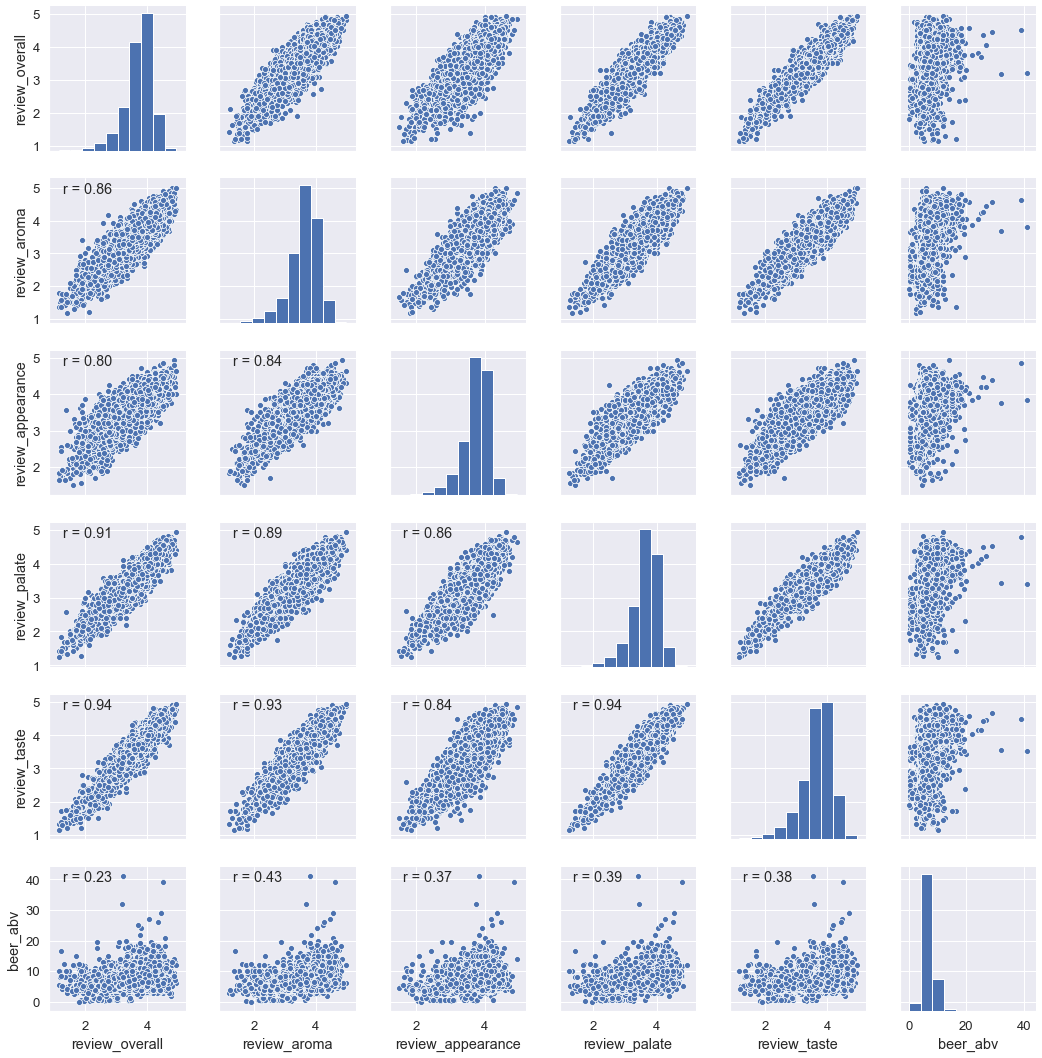

In [66]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt 

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r_, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    r = 'r'
    ax.annotate(f'{r} = {r_:.2f}', xy=(.1, .9), xycoords=ax.transAxes)


g=sns.pairplot( df_groupby_id, vars=['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv'])


g.map_lower(corrfunc)
plt.show()

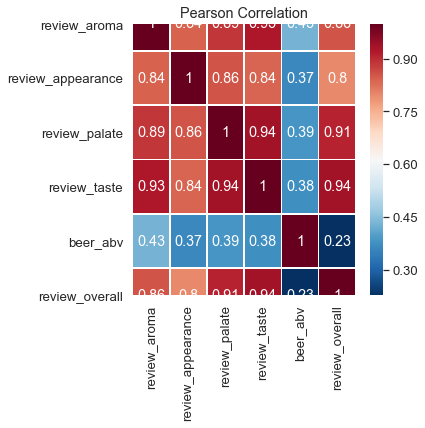

In [67]:
import seaborn as sb
pearsoncorr = df_groupby_id[['review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv', 'review_overall']].corr(method='pearson')

plt.figure( figsize = ( 5, 5 ))
plt.title( 'Pearson Correlation' )

sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

### Significance tests for the correlation

In [68]:
import itertools
import operator
list_comb=list(itertools.combinations(['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv'], 2))
list_comb

[('review_overall', 'review_aroma'),
 ('review_overall', 'review_appearance'),
 ('review_overall', 'review_palate'),
 ('review_overall', 'review_taste'),
 ('review_overall', 'beer_abv'),
 ('review_aroma', 'review_appearance'),
 ('review_aroma', 'review_palate'),
 ('review_aroma', 'review_taste'),
 ('review_aroma', 'beer_abv'),
 ('review_appearance', 'review_palate'),
 ('review_appearance', 'review_taste'),
 ('review_appearance', 'beer_abv'),
 ('review_palate', 'review_taste'),
 ('review_palate', 'beer_abv'),
 ('review_taste', 'beer_abv')]

In [69]:
import scipy
from scipy import stats
for i in list_comb:
    x=df_groupby_id[i[0]]
    y=df_groupby_id[i[1]]
    print("Pearson correlation coefficient and p-value for ", i,scipy.stats.pearsonr(x,y))
    

Pearson correlation coefficient and p-value for  ('review_overall', 'review_aroma') (0.8579941669867, 0.0)
Pearson correlation coefficient and p-value for  ('review_overall', 'review_appearance') (0.7998254457853803, 0.0)
Pearson correlation coefficient and p-value for  ('review_overall', 'review_palate') (0.9109718817119691, 0.0)
Pearson correlation coefficient and p-value for  ('review_overall', 'review_taste') (0.9386118010981823, 0.0)
Pearson correlation coefficient and p-value for  ('review_overall', 'beer_abv') (0.22668732164558508, 2.3913370475847325e-222)
Pearson correlation coefficient and p-value for  ('review_aroma', 'review_appearance') (0.8418257079877123, 0.0)
Pearson correlation coefficient and p-value for  ('review_aroma', 'review_palate') (0.8900630937488139, 0.0)
Pearson correlation coefficient and p-value for  ('review_aroma', 'review_taste') (0.9255569871707411, 0.0)
Pearson correlation coefficient and p-value for  ('review_aroma', 'beer_abv') (0.4303236856174091, 0

## 2.4 The relationship between abv and rating

In [70]:
## define the abv classes
abv_class=[]
for item in df_groupby_id['beer_abv']:
  if item <2:
        abv_class.append('Low')
  elif item >=2 and item <= 8:
    abv_class.append('Medium')
  else:
    abv_class.append('High')

In [71]:
Counter(abv_class)

Counter({'Medium': 15260, 'High': 3910, 'Low': 39})

In [72]:
df_groupby_id['abv_class']=abv_class

In [73]:
df_groupby_id.head()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid,abv_class
beer_beerid,,,,,,,,
5,3.549528,3.205189,3.485849,3.318396,3.340802,4.5,5,Medium
6,3.706956,3.515964,3.836374,3.513113,3.645382,5.6,6,Medium
7,3.266313,3.179059,3.251138,3.106980,3.101669,4.2,7,Medium
8,3.647059,3.080882,3.294118,3.301471,3.235294,4.2,8,Medium
9,3.400862,2.853448,3.051724,3.103448,3.043103,4.2,9,Medium


In [74]:
## ANONA test for abv class and rating score
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('review_overall ~ C(abv_class)',
                data=df_groupby_id).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                   sum_sq       df           F         PR(>F)
C(abv_class)   128.006512      2.0  319.418558  3.431411e-137
Residual      3848.387965  19206.0         NaN            NaN


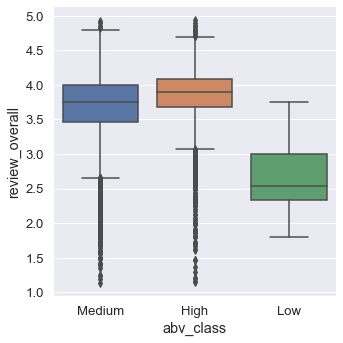

In [75]:
sns.catplot(x='abv_class',y='review_overall',data=df_groupby_id,kind='box')

## 2.4 Relationship between the beer style and rating

In [76]:
df_groupby_style=df_re[ [ 'review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv','beer_style']].groupby(df['beer_style']).mean()

In [143]:
df_groupby_style.head()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
beer_style,,,,,,
Altbier,3.833333,3.634010,3.811636,3.721389,3.757134,5.850034
American Adjunct Lager,3.021274,2.480043,2.785267,2.741063,2.692890,4.858773
American Amber / Red Ale,3.810676,3.660313,3.834881,3.683417,3.727547,6.042782
American Amber / Red Lager,3.581735,3.219409,3.534314,3.365960,3.388121,4.952086
American Barleywine,3.898631,4.025014,4.043828,4.002668,4.047732,10.709947


In [145]:
df_groupby_style.shape

(104, 6)

In [78]:
plt.figure(figsize=(25, 10))

from scipy.cluster.hierarchy  import linkage,dendrogram
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
mergings = linkage(df_groupby_style,method='complete')

<Figure size 1800x720 with 0 Axes>

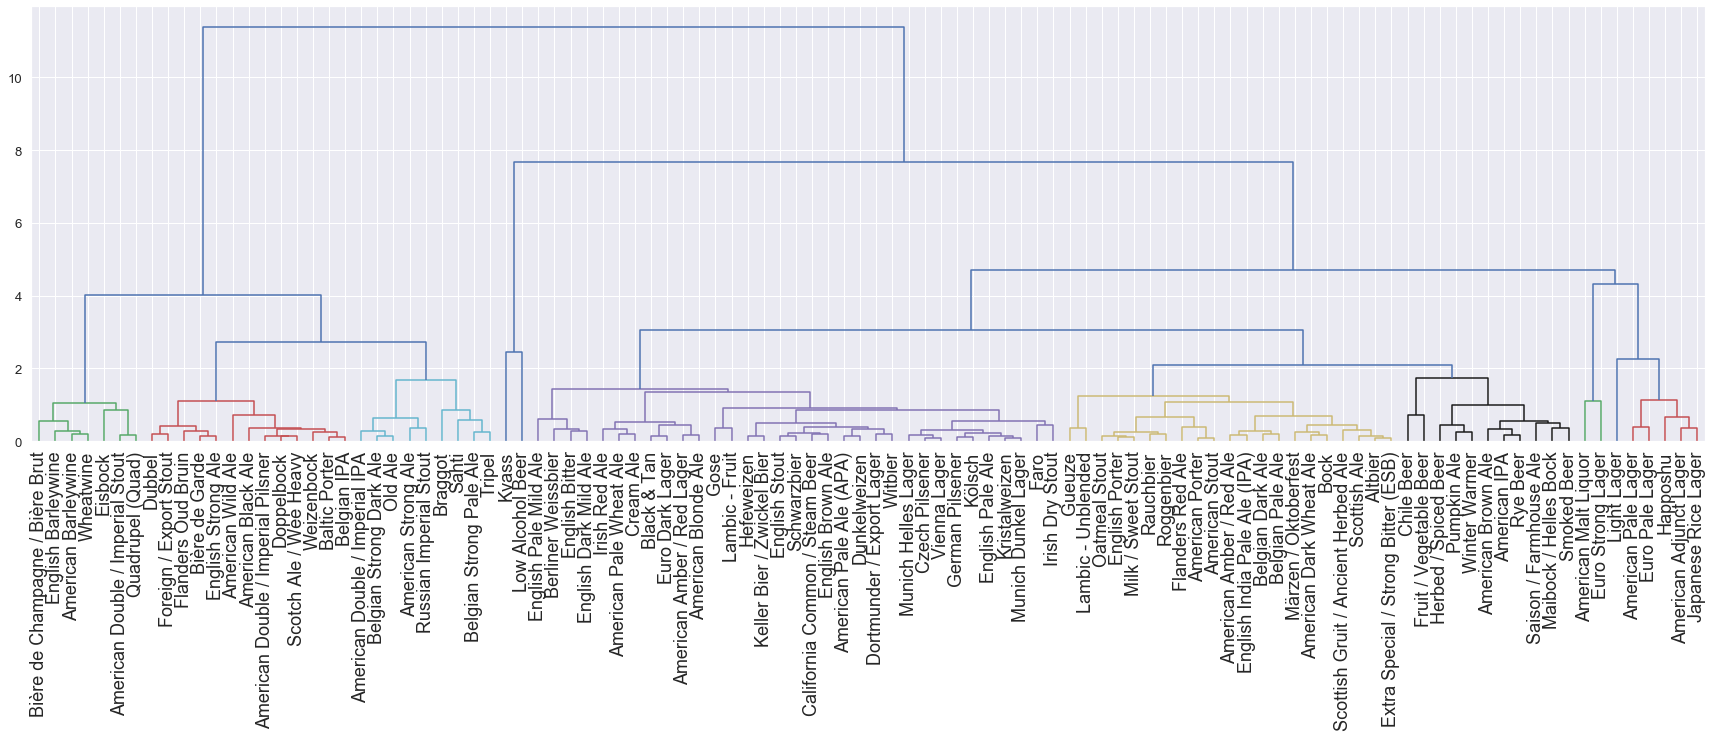

In [79]:
plt.figure(figsize=(30, 8))
# Plot the dendrogram, using beer_id as labels
dendrogram(mergings,color_threshold=2,labels=df_groupby_style.index,
           leaf_rotation=90,
           leaf_font_size=18,
)
plt.show()

In [80]:
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings,2,criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'index': df_groupby_style.index})
df_cluster=df.sort_values(by=['labels'])

In [81]:
df_cluster.head(20)

,labels,index
101,1,Wheatwine
42,1,English Barleywine
4,1,American Barleywine
41,1,Eisbock
28,1,Bière de Champagne / Bière Brut
11,1,American Double / Imperial Stout
86,1,Quadrupel (Quad)
51,2,English Strong Ale
57,2,Flanders Oud Bruin
59,2,Foreign / Export Stout


In [82]:
style_with_label=pd.merge(df,df_groupby_style,left_on=df['index'],right_on=df_groupby_style.index)

In [83]:
style_with_label.head()

,key_0,labels,index,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
0,Altbier,7,Altbier,3.833333,3.634010,3.811636,3.721389,3.757134,5.850034
1,American Adjunct Lager,10,American Adjunct Lager,3.021274,2.480043,2.785267,2.741063,2.692890,4.858773
2,American Amber / Red Ale,7,American Amber / Red Ale,3.810676,3.660313,3.834881,3.683417,3.727547,6.042782
3,American Amber / Red Lager,6,American Amber / Red Lager,3.581735,3.219409,3.534314,3.365960,3.388121,4.952086
4,American Barleywine,1,American Barleywine,3.898631,4.025014,4.043828,4.002668,4.047732,10.709947


In [84]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('review_overall ~ C(labels)',
                data=style_with_label).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

             sum_sq    df          F        PR(>F)
C(labels)  7.250506  10.0  31.975852  7.110717e-26
Residual   2.108770  93.0        NaN           NaN


In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
p = pca.fit( df_groupby_style).fit_transform(df_groupby_style)
p=pd.DataFrame(p)
p.head()

,0,1
0,0.570215,-0.243775
1,2.052908,1.728824
2,0.386191,-0.182503
3,1.618231,0.284808
4,-4.297258,0.302470


In [86]:
p=p.rename(columns={0:'PC1',1:'PC2'})

In [87]:
p['cluster_labels']=df['labels']

In [88]:
p.head()

,PC1,PC2,cluster_labels
0,0.570215,-0.243775,7
1,2.052908,1.728824,10
2,0.386191,-0.182503,7
3,1.618231,0.284808,6
4,-4.297258,0.302470,1


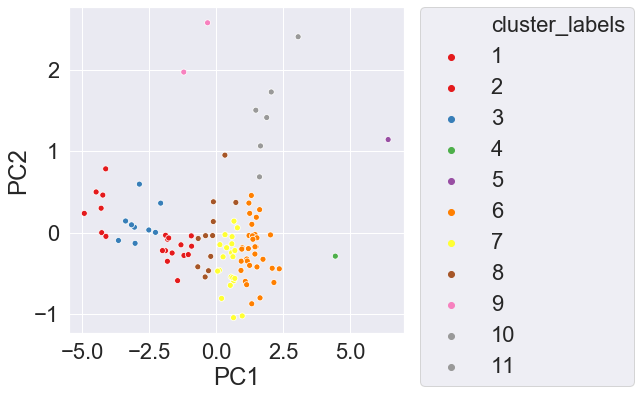

In [89]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_style("white")
sns.set(font_scale=2)
ax=sns.scatterplot(x='PC1',y='PC2',hue='cluster_labels',legend='full',palette="Set1",data=p)
ax=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# 3.Building and Testing Recommender Systems With Surprise

### Data format was converted to fit in Surprise 

In [90]:
# conda update -n base -c defaults conda


In [91]:
# conda install -c conda-forge scikit-surprise

In [92]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
import pandas as pd

from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

In [93]:
df_surprise=df_new[['beer_beerid','review_overall','review_profilename']]

In [94]:
df_surprise.head()

,beer_beerid,review_overall,review_profilename
5,52159,3.0,oline73
6,52159,3.5,Reidrover
7,52159,3.0,alpinebryant
8,52159,4.0,LordAdmNelson
9,52159,4.5,augustgarage


In [95]:
df_surprise=df_surprise.rename(columns={'beer_beerid':'itemID','review_profilename':'userID','review_overall':'rating'})

In [96]:
df_surprise.head() 

,itemID,rating,userID
5,52159,3.0,oline73
6,52159,3.5,Reidrover
7,52159,3.0,alpinebryant
8,52159,4.0,LordAdmNelson
9,52159,4.5,augustgarage


In [97]:
df_surprise = df_surprise[['userID','itemID','rating']]

In [98]:
df_surprise.head()

,userID,itemID,rating
5,oline73,52159,3.0
6,Reidrover,52159,3.5
7,alpinebryant,52159,3.0
8,LordAdmNelson,52159,4.0
9,augustgarage,52159,4.5


In [101]:
df_surprise.to_csv('df_surprise.csv',index='False')

## 3.1 Choose the best algorithms

In [102]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_surprise[['userID', 'itemID', 'rating']], reader)

In [103]:
from surprise import prediction_algorithms
from surprise import NormalPredictor
from surprise import BaselineOnly
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import CoClustering

In [111]:

benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), NMF(),SVDpp(),  NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(),  BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse') 

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,0.597528,7313.032715,337.362063
BaselineOnly,0.601164,3.928861,6.072451
KNNBaseline,0.601506,82.245114,232.196409
SVD,0.603737,77.266234,6.828465
KNNBasic,0.619537,76.561866,209.499097
NMF,0.624659,79.145182,5.830669
KNNWithMeans,0.624937,77.103340,219.809319
CoClustering,0.666265,40.169924,6.112460
NormalPredictor,0.988958,2.286215,6.465656


Train and Predict
SVDpp algorithm gave us the best rmse, but took too long to fit and test. I will train and predict with SVDpp.
We use the train_test_split() to sample a trainset and a testset with given sizes, and use the accuracy metric of rmse. We’ll then use the fit() method which will train the algorithm on the trainset, and the test() method which will return the predictions made from the testset.

## 3.2 Tuning and Evaluating the SVDpp  Model

In [110]:
from surprise import SVDpp
from surprise import Dataset
from surprise.model_selection import GridSearchCV



param_grid = {'n_epochs': [5, 10], 'lr_all': [0.001, 0.01],
              'reg_all': [0.1, 0.5]}
gs = GridSearchCV(SVDpp, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.6035285088937462
{'n_epochs': 10, 'lr_all': 0.01, 'reg_all': 0.1}


## 3.3 Making recommendations with SVDpp model

In [131]:
from surprise import SVDpp
from surprise import accuracy
from surprise.model_selection import KFold
# define a cross-validation iterator
kf = KFold(n_splits=3)

algo = SVD(n_epochs=10, lr_all=0.01, reg_all= 0.1)

for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)

RMSE: 0.6039
RMSE: 0.6035
RMSE: 0.6033


In [ ]:
## To inspect our predictions in details, we are going to build a pandas data frame with all the predictions. The following code were largely taken from this notebook.

In [109]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [112]:
df.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,Wetpaperbag,53706,4.5,3.977568,{'was_impossible': False},284,33,0.522432
1,akorsak,22441,4.0,3.787451,{'was_impossible': False},1711,21,0.212549
2,PatandDavid,6590,3.5,3.680863,{'was_impossible': False},325,574,0.180863
3,badboyrsl84,50752,4.5,4.207935,{'was_impossible': False},87,231,0.292065
4,Axic10,41505,2.0,3.707704,{'was_impossible': False},200,205,1.707704


In [110]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
271580,BeerLover48Fan,6322,5.0,5.0,{'was_impossible': False},30,712,0.0
408778,oteyj,1545,5.0,5.0,{'was_impossible': False},60,861,0.0
188269,kdawg105,1493,5.0,5.0,{'was_impossible': False},45,444,0.0
34675,oteyj,7289,5.0,5.0,{'was_impossible': False},60,12,0.0
427169,kdawg105,6549,5.0,5.0,{'was_impossible': False},45,908,0.0
320391,oldcrustacean,9478,5.0,5.0,{'was_impossible': False},7,817,0.0
240028,MirkoCroCough,15881,5.0,5.0,{'was_impossible': False},29,1277,0.0
371336,kdawg105,593,5.0,5.0,{'was_impossible': False},45,656,0.0
142094,oteyj,51116,5.0,5.0,{'was_impossible': False},60,127,0.0
201098,oldcrustacean,51726,5.0,5.0,{'was_impossible': False},7,19,0.0


In [118]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
269971,NaLoGra,30420,1.0,4.358945,{'was_impossible': False},13,1517,3.358945
454952,Beejis60,7971,1.0,4.360348,{'was_impossible': False},1,1907,3.360348
473335,cerevisiaephilus,1558,1.0,4.372041,{'was_impossible': False},108,1095,3.372041
265910,irishevans,197,1.0,4.374249,{'was_impossible': False},76,568,3.374249
363443,MusicmanSD,412,1.0,4.421851,{'was_impossible': False},60,2348,3.421851
455857,KickInTheChalice,60426,1.0,4.436394,{'was_impossible': False},502,69,3.436394
55790,madtappers,44409,1.0,4.447494,{'was_impossible': False},48,269,3.447494
237259,marlinsfan4,219,1.0,4.492182,{'was_impossible': False},471,906,3.492182
188393,beernut7,3806,0.0,3.667541,{'was_impossible': False},367,5,3.667541
418678,beernut7,3804,0.0,3.866857,{'was_impossible': False},367,9,3.866857


### Trained the model on the whole dataset and then predict all the ratings for a specific pairs (user, item)

In [137]:
output_whole=algo.fit(data.build_full_trainset())

In [138]:
## A function to check the predicted score of each beer that a specific user didn't rate

In [139]:
def ck_score(test_id):
    iids=df_surprise['itemID'].unique()
    iids_test=df_surprise.loc[df_surprise['userID']==test_id,'itemID']
    iids_to_pred=np.setdiff1d(iids,iids_test) ## find out the id the tested user did not rate
    testset=[[test_id,iid,5] for iid in iids_to_pred]
    predictions=algo.test(testset) 
    pred_rating=np.array([pred.est for pred in predictions])
    i_max=pred_rating.argmax()
    iid=iids_to_pred[i_max]
    print('Top beer for the user has iid {0} with predicted rating {1}'. format(iid,pred_rating[i_max]))

In [140]:
## use the function to check the user NaLoGra
ck_score('NaLoGra')

Top beer for the user has iid 68548 with predicted rating 4.896984237098411


In [141]:
## A function to give top 10 recommendation for a specific user 
def ck_score_top10(test_id):
    iids=df_surprise['itemID'].unique()
    iids_test=df_surprise.loc[df_surprise['userID']==test_id,'itemID']
    iids_to_pred=np.setdiff1d(iids,iids_test) ## find out the id the tested user did not rate
    testset=[[test_id,iid,5] for iid in iids_to_pred]
    predictions=algo.test(testset) 
    pred_rating=np.array([pred.est for pred in predictions])
    top_n = get_top_n(predictions, n=10)
    return top_n

In [132]:
### Get the top-N recommendations for each user function
from collections import defaultdict

from surprise import SVD
from surprise import Dataset


def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [142]:
ck_score_top10('NaLoGra')

defaultdict(list,
            {'NaLoGra': [(68548, 4.896984237098411),
              (8626, 4.872674901663519),
              (70356, 4.863681800294114),
              (45957, 4.814962145435565),
              (23413, 4.808244394262004),
              (54147, 4.792432378577127),
              (47668, 4.791712465535287),
              (56082, 4.775457353903229),
              (23414, 4.767387171759131),
              (1545, 4.7619780870958035)]})

In [ ]:
## acquire more information for the top beer

In [38]:
item=[68548,8626,70356,45957,23413,54147,47668,56082,23414,1545]
df_nalogra=df.loc[df['beer_beerid'].isin(item)].drop_duplicates(subset='beer_beerid', keep="first")

In [39]:
df_nalogra=df_nalogra[['brewery_name','beer_name','beer_beerid']]
df_nalogra

,brewery_name,beer_name,beer_beerid
235630,Southampton Publick House,Southampton Berliner Weisse,8626
334855,Kern River Brewing Company,Citra DIPA,56082
664849,Brouwerij Drie Fonteinen,Geuze Cuvée J&J (Joost En Jessie) Blauw (Blue),23413
665188,Brouwerij Drie Fonteinen,Armand'4 Oude Geuze Zomer (Summer),70356
665396,Brouwerij Drie Fonteinen,Armand'4 Oude Geuze Lente (Spring),68548
665494,Brouwerij Drie Fonteinen,Geuze Cuvée J&J (Jessie En Joost) Roos (Rose),23414
786294,The Lost Abbey,Veritas 004,45957
789359,The Lost Abbey,Veritas 005,54147
1225166,FiftyFifty Brewing Co.,Imperial Eclipse Stout - Pappy Van Winkle,47668
1479675,Brouwerij Westvleteren (Sint-Sixtusabdij van W...,Trappist Westvleteren 12,1545
